In [ ]:
# Data format: {look_back: {prediction_time: (mean_auroc, lower_ci, upper_ci)}}
# InSight Results (Blue Bars)
insight_results = {
    5: {3: (0.72, 0.70, 0.74), 6: (0.71, 0.69, 0.73), 12: (0.70, 0.68, 0.72)},
    10: {3: (0.73, 0.71, 0.75), 6: (0.72, 0.70, 0.74), 12: (0.71, 0.69, 0.73)},
    15: {3: (0.74, 0.72, 0.76), 6: (0.73, 0.71, 0.75), 12: (0.72, 0.70, 0.74)},
    20: {3: (0.75, 0.73, 0.77), 6: (0.74, 0.72, 0.76), 12: (0.73, 0.71, 0.75)},
}

# RNN Results (Yellow Bars)
rnn_results = {
    5: {3: (0.80, 0.78, 0.82), 6: (0.78, 0.76, 0.80), 12: (0.77, 0.75, 0.79)},
    10: {3: (0.82, 0.80, 0.84), 6: (0.80, 0.78, 0.82), 12: (0.79, 0.77, 0.81)},
    15: {3: (0.83, 0.81, 0.85), 6: (0.81, 0.79, 0.83), 12: (0.80, 0.78, 0.82)},
    20: {3: (0.85, 0.83, 0.87), 6: (0.83, 0.81, 0.85), 12: (0.82, 0.80, 0.84)},
}

In [ ]:
new_rnn_results_raw = [
    (3, 5, 0.928555729, 0.005803001),
    (3, 10, 0.937180898, 0.018396966),
    (3, 15, 0.97217648, 0.004890154),
    (3, 20, 0.982005455, 0.006110732),
    (6, 5, 0.949860623, 0.0048203),
    (6, 10, 0.964365697, 0.0013593),
    (6, 15, 0.972550016, 0.008173289),
    (6, 20, 0.972717532, 0.015860645),
    (12, 5, 0.960877269, 0.001103236),
    (12, 10, 0.974658306, 0.002847773),
    (12, 15, 0.979697704, 0.003534657),
    (12, 20, 0.968288019, 0.027645451)
]

new_rnn_results = {}
for prediction_time, look_back, mean_auroc, std_auroc in new_rnn_results_raw:
    lower_ci = mean_auroc - 1.96 * std_auroc
    upper_ci = mean_auroc + 1.96 * std_auroc

    if look_back not in new_rnn_results:
        new_rnn_results[look_back] = {}
    new_rnn_results[look_back][prediction_time] = (mean_auroc, lower_ci, upper_ci)


new_rnn_results


{5: {3: (0.928555729, 0.91718184704, 0.93992961096),
  6: (0.949860623, 0.940412835, 0.959308411),
  12: (0.960877269, 0.95871492644, 0.9630396115600001)},
 10: {3: (0.937180898, 0.90112284464, 0.97323895136),
  6: (0.964365697, 0.961701469, 0.967029925),
  12: (0.974658306, 0.96907667092, 0.98023994108)},
 15: {3: (0.97217648, 0.96259177816, 0.98176118184),
  6: (0.972550016, 0.95653036956, 0.98856966244),
  12: (0.979697704, 0.97276977628, 0.98662563172)},
 20: {3: (0.982005455, 0.97002842028, 0.99398248972),
  6: (0.972717532, 0.9416306678, 1.0038043962),
  12: (0.968288019, 0.9141029350400001, 1.02247310296)}}

In [ ]:
# Look-back windows and prediction times
look_backs = [5, 10, 15, 20]
prediction_times = [3, 6, 12]

methods = {
    "InSight": insight_results,
    "Original RNN": rnn_results,
    "Group AJA RNN": new_rnn_results
}

mean_aurocs = {method: [] for method in methods}
lower_errors = {method: [] for method in methods}
upper_errors = {method: [] for method in methods}

for method, results in methods.items():
    for look_back in look_backs:
        for prediction_time in prediction_times:
            mean_auroc, lower_ci, upper_ci = results[look_back][prediction_time]
            mean_aurocs[method].append(mean_auroc)
            lower_errors[method].append(mean_auroc - lower_ci)
            upper_errors[method].append(upper_ci - mean_auroc)


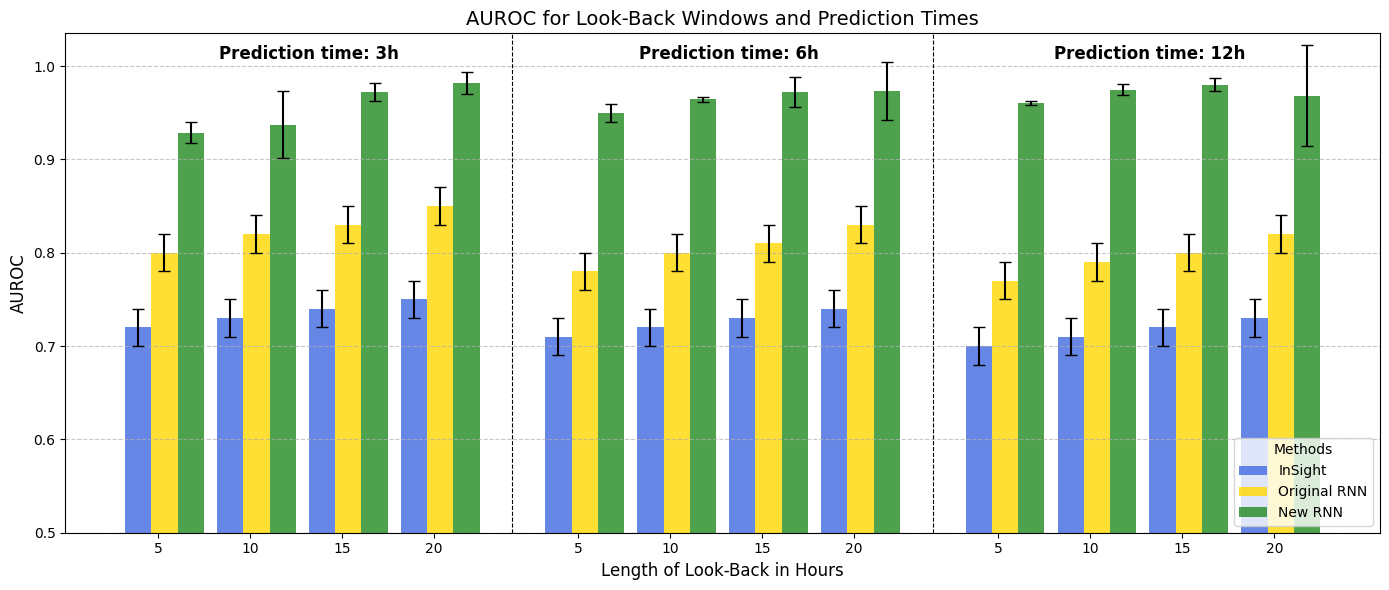

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

look_backs = [5, 10, 15, 20]
prediction_times = [3, 6, 12]
methods = {
    "InSight": insight_results,
    "Original RNN": rnn_results,
    "New RNN": new_rnn_results
}

colors = ['royalblue', 'gold', 'forestgreen']
method_labels = list(methods.keys())

bar_width = 0.2
group_spacing = bar_width * len(methods) + 0.1
prediction_time_spacing = len(look_backs) * group_spacing + 0.4


x = np.arange(len(look_backs)) * group_spacing

# Initialize plot
plt.figure(figsize=(14, 6))

for j, prediction_time in enumerate(prediction_times):
    for i, method in enumerate(method_labels):
        positions = x + j * prediction_time_spacing + i * bar_width
        mean_aurocs = [methods[method][lb][prediction_time][0] for lb in look_backs]
        lower_errors = [methods[method][lb][prediction_time][0] - methods[method][lb][prediction_time][1] for lb in look_backs]
        upper_errors = [methods[method][lb][prediction_time][2] - methods[method][lb][prediction_time][0] for lb in look_backs]

        plt.bar(
            positions,
            mean_aurocs,
            width=bar_width,
            yerr=[lower_errors, upper_errors],
            capsize=4,
            label=method if j == 0 else None,
            color=colors[i],
            alpha=0.8
        )


plt.title('AUROC for Look-Back Windows and Prediction Times', fontsize=14)
plt.xlabel('Length of Look-Back in Hours', fontsize=12)
plt.ylabel('AUROC', fontsize=12)
plt.ylim(0.5, 1.035)

tick_positions = []
tick_labels = []
for j, prediction_time in enumerate(prediction_times):
    for i, look_back in enumerate(look_backs):
        tick_positions.append(x[i] + j * prediction_time_spacing + group_spacing / 2 - bar_width)
        tick_labels.append(f"{look_back}")

plt.xticks(tick_positions, tick_labels, fontsize=10)

for j, prediction_time in enumerate(prediction_times):
    x_mid = x[0] + j * prediction_time_spacing + (len(look_backs) * group_spacing - bar_width) / 2
    plt.text(
        x_mid,
        1.003,
        f"Prediction time: {prediction_time}h",
        fontsize=12,
        ha='center',
        va='bottom',
        weight='bold'
    )


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend(title="Methods", fontsize=10, loc="lower right")


for j in range(1, len(prediction_times)):
    plt.axvline(x=j * prediction_time_spacing - group_spacing / 2, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()


In [1]:
!jupyter nbconvert --to html BANA650_Post_Modeling_Visualizations.ipynb

[NbConvertApp] Converting notebook BANA650_Post_Modeling_Visualizations.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 374687 bytes to BANA650_Post_Modeling_Visualizations.html
